In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("listings.csv")
airbnb_data = data[(data['price']>0) & (data['price']<=500)]

In [3]:
airbnb_data['neighbourhood_group'].value_counts()

Central Region       6137
West Region           530
East Region           499
North-East Region     341
North Region          201
Name: neighbourhood_group, dtype: int64

In [4]:
airbnb_data['neighbourhood'].value_counts()

Kallang                    1021
Geylang                     977
Novena                      535
Rochor                      510
Outram                      471
Bukit Merah                 463
Downtown Core               421
Bedok                       366
River Valley                351
Queenstown                  264
Tanglin                     203
Marine Parade               170
Singapore River             159
Jurong West                 150
Bukit Timah                 130
Newton                      127
Jurong East                 117
Orchard                     116
Hougang                     106
Clementi                    101
Toa Payoh                   100
Pasir Ris                    70
Serangoon                    69
Woodlands                    67
Sengkang                     66
Tampines                     63
Bukit Batok                  63
Choa Chu Kang                62
Museum                       60
Ang Mo Kio                   57
Bishan                       53
Yishun  

In [5]:
airbnb_data.isna().sum() 

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2636
reviews_per_month                 2636
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
airbnb_data['reviews_per_month'].fillna(0, inplace=True)
airbnb_data.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [7]:
## renaming columns
airbnb_data = airbnb_data.rename(columns={"neighbourhood_group": "Region", "neighbourhood":"Neighborhood", "price":"Price"})
airbnb_data.head()

,id,name,host_id,host_name,Region,Neighborhood,latitude,longitude,room_type,Price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


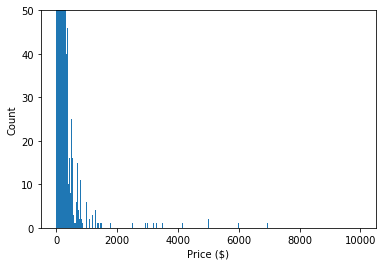

In [8]:
## Distribution of prices - leaving in listings at $0/night and listings >$500/night. 
plt.hist(data['price'], bins='auto')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.ylim(0, 50)
plt.show();

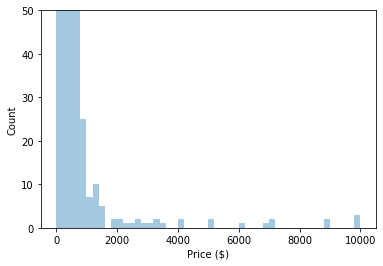

In [9]:
## W/ Seaborn
sns.distplot(data['price'], axlabel='Price ($)', kde=False)
plt.ylim(0, 50)
plt.ylabel('Count')
plt.show();

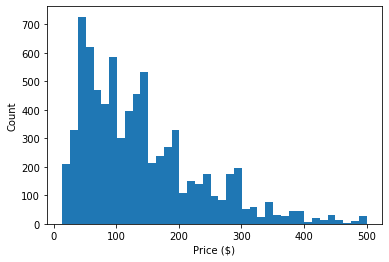

In [10]:
## After removing listings that cost $0 and listings over $500. 
plt.hist(airbnb_data['Price'], bins='auto')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show();

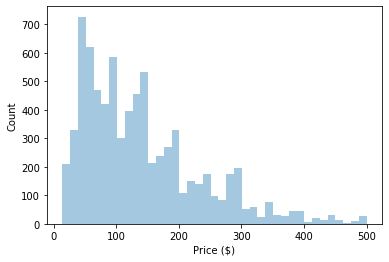

In [11]:
## W/Seaborn
sns.distplot(airbnb_data['Price'], axlabel='Price ($)', kde=False)
plt.ylabel('Count')
plt.show();

In [12]:
## groupby to find average prices by region.
airbnb_price_by_region = pd.DataFrame(airbnb_data['Price'].groupby(by=airbnb_data['Region']).mean()).reset_index()
airbnb_price_by_region.head()

,Region,Price
0,Central Region,150.419097
1,East Region,110.280561
2,North Region,103.179104
3,North-East Region,86.052786
4,West Region,105.220755


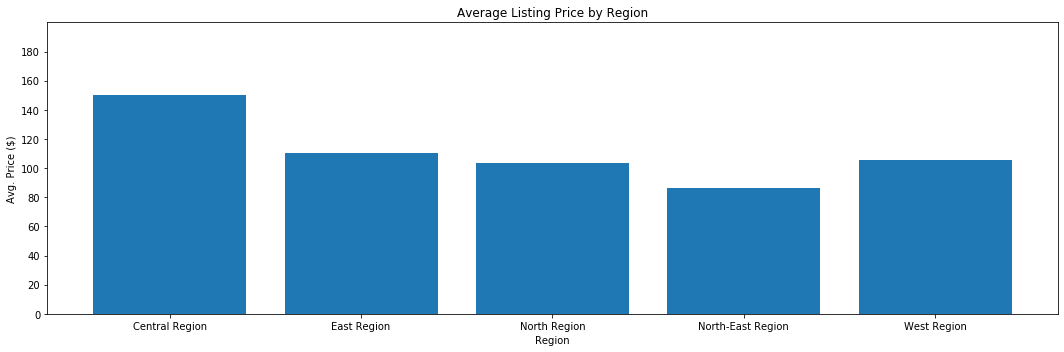

In [13]:
## Plotting the average price by region. After removing listings that cost $0 and listings over $500. 
plt.figure(figsize=(15, 5))
plt.ylim(0, 200)
plt.yticks(np.arange(0, 200, step=20))
plt.title('Average Listing Price by Region')
plt.xlabel('Region')
plt.ylabel('Avg. Price ($)')
plt.tight_layout()
plt.bar(x=airbnb_price_by_region['Region'], height=airbnb_price_by_region['Price'])
plt.show();

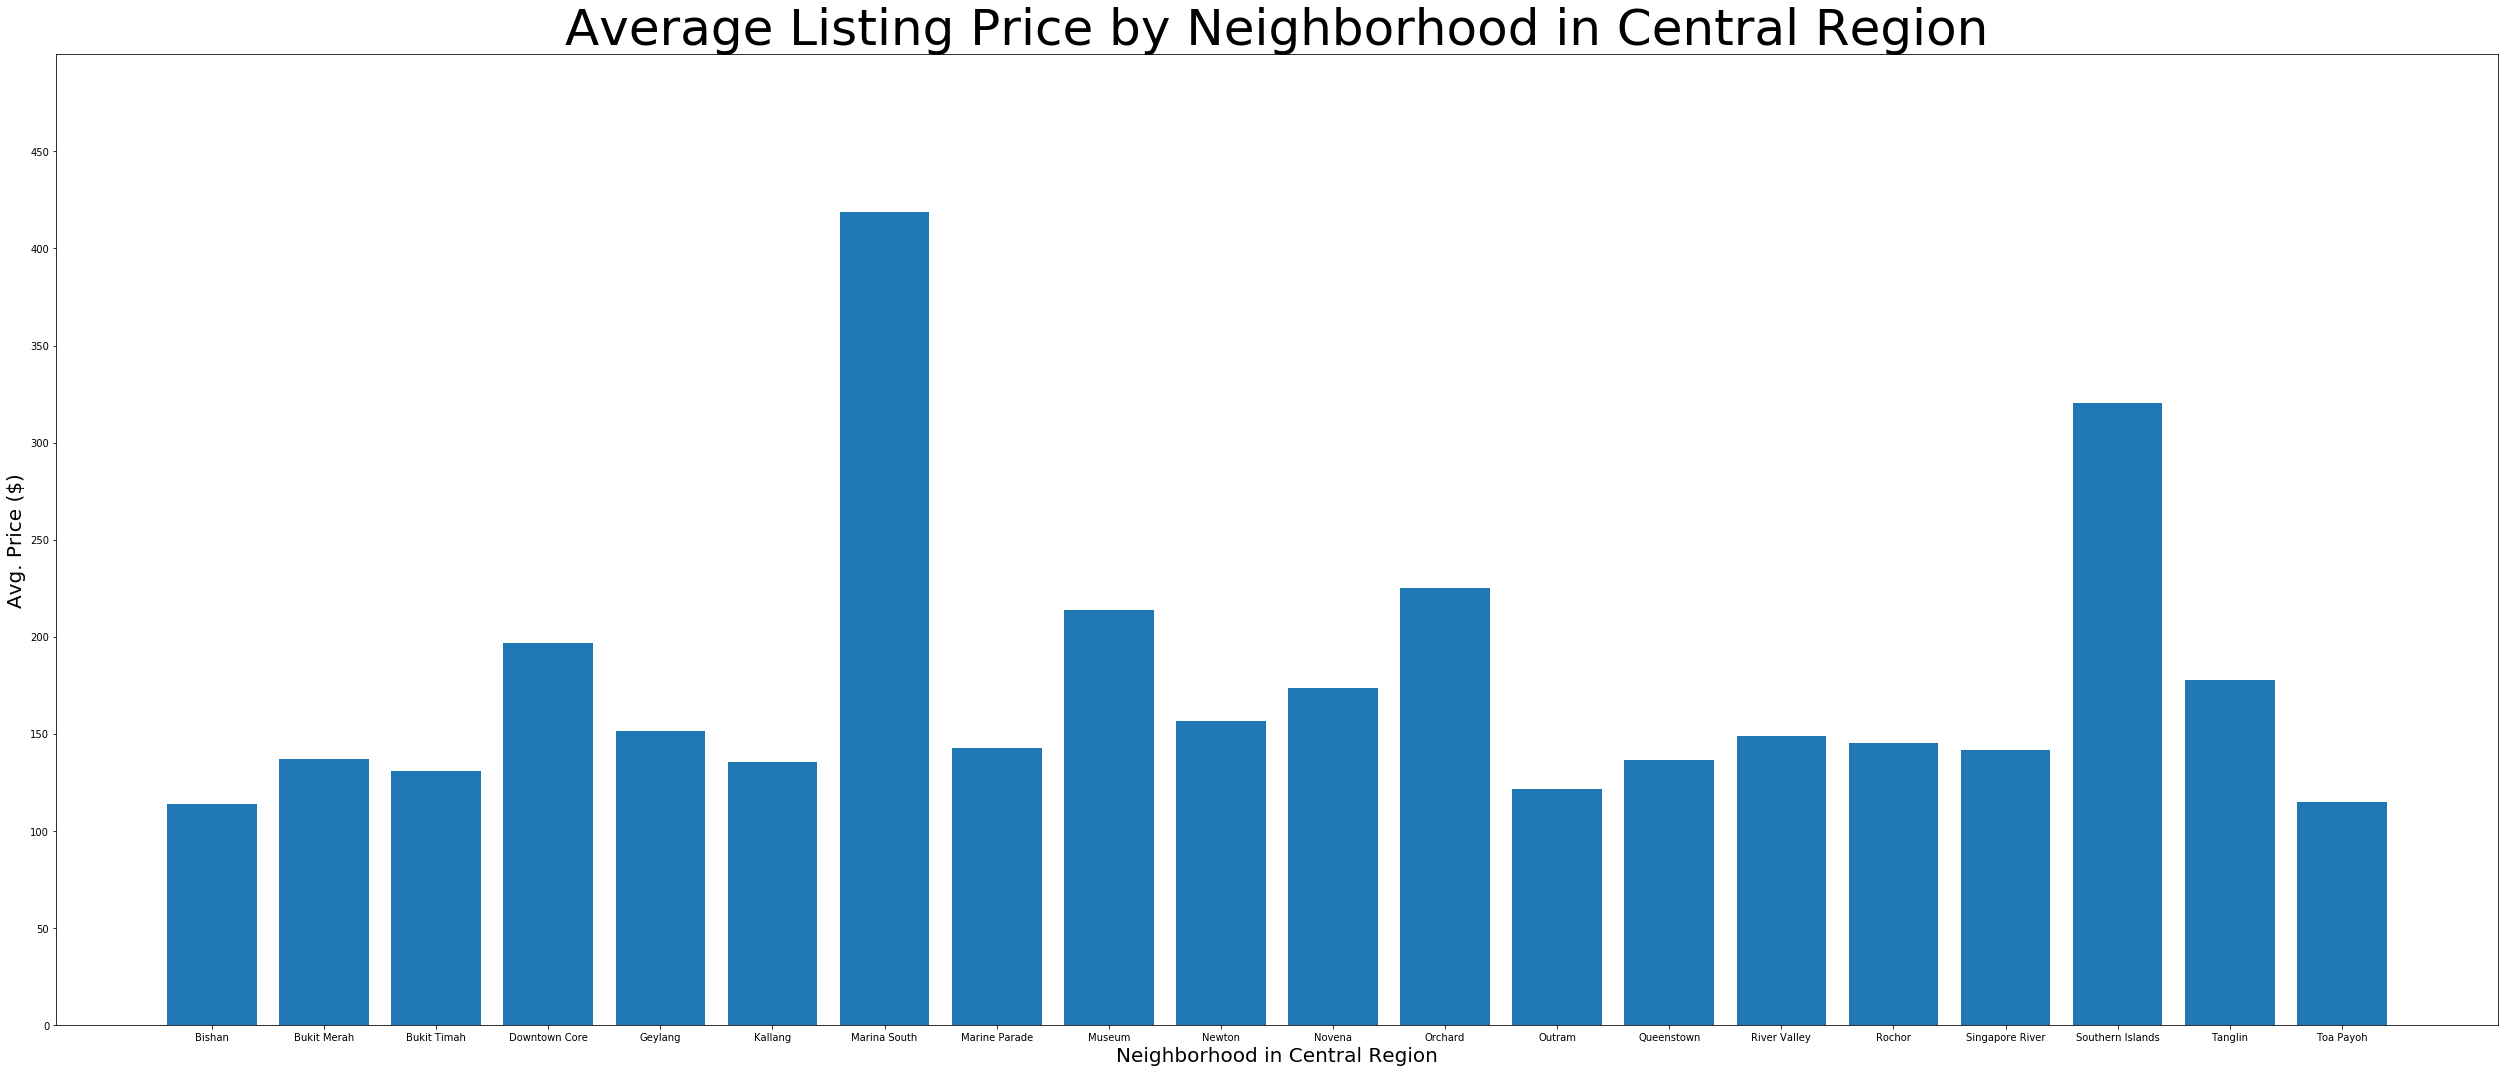

In [14]:
## Central Region
## Break average listing prices down even further by isolating each neighborhood within a region. Note: Using data w/o >$500 and $0 listings.
central_region_breakdown = airbnb_data[airbnb_data['Region']=='Central Region']

## Groupby to find avg listing price in each neighborhood within the central region.
price_by_neighborhood_central = pd.DataFrame(central_region_breakdown['Price'].groupby(by=central_region_breakdown['Neighborhood']).mean()).reset_index()

## Plotting the average price by neighborhood in the central region.
plt.figure(figsize=(35,15))
plt.ylim(0, 500)
plt.yticks(np.arange(0, 500, step=50))
plt.title('Average Listing Price by Neighborhood in Central Region', fontsize=50)
plt.xlabel('Neighborhood in Central Region', fontsize=20)
plt.ylabel('Avg. Price ($)', fontsize=20)
plt.tight_layout()
plt.bar(x=price_by_neighborhood_central['Neighborhood'], height=price_by_neighborhood_central['Price'])
plt.show();

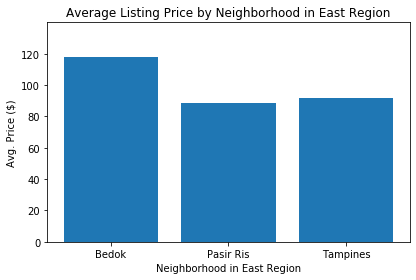

In [15]:
## East Region
## Note: Using data w/o >$500 and $0 listings.
east_region_breakdown = airbnb_data[airbnb_data['Region']=='East Region']

## Groupby to find avg listing price in each neighborhood within the central region.
price_by_neighborhood_east = pd.DataFrame(east_region_breakdown['Price'].groupby(by=east_region_breakdown['Neighborhood']).mean()).reset_index()

## Plotting the average price by neighborhood in the central region.
plt.ylim(0, 140)
plt.yticks(np.arange(0, 140, step=20))
plt.title('Average Listing Price by Neighborhood in East Region')
plt.xlabel('Neighborhood in East Region')
plt.ylabel('Avg. Price ($)')
plt.tight_layout()
plt.bar(x=price_by_neighborhood_east['Neighborhood'], height=price_by_neighborhood_east['Price'])
plt.show();

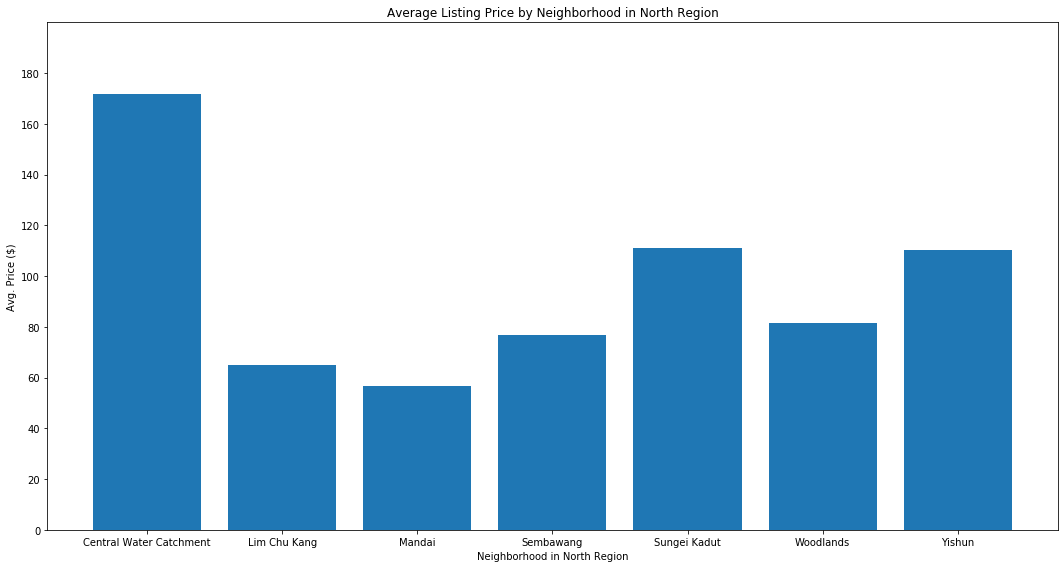

In [16]:
## North Region
## Note: Using data w/o >$500 and $0 listings.
north_region_breakdown = airbnb_data[airbnb_data['Region']=='North Region']

## Groupby to find avg listing price in each neighborhood within the central region.
price_by_neighborhood_north = pd.DataFrame(north_region_breakdown['Price'].groupby(by=north_region_breakdown['Neighborhood']).mean()).reset_index()

## Plotting the average price by neighborhood in the central region.
plt.figure(figsize=(15,8))
plt.ylim(0, 200)
plt.yticks(np.arange(0, 200, step=20))
plt.title('Average Listing Price by Neighborhood in North Region')
plt.xlabel('Neighborhood in North Region')
plt.ylabel('Avg. Price ($)')
plt.tight_layout()
plt.bar(x=price_by_neighborhood_north['Neighborhood'], height=price_by_neighborhood_north['Price'])
plt.show();

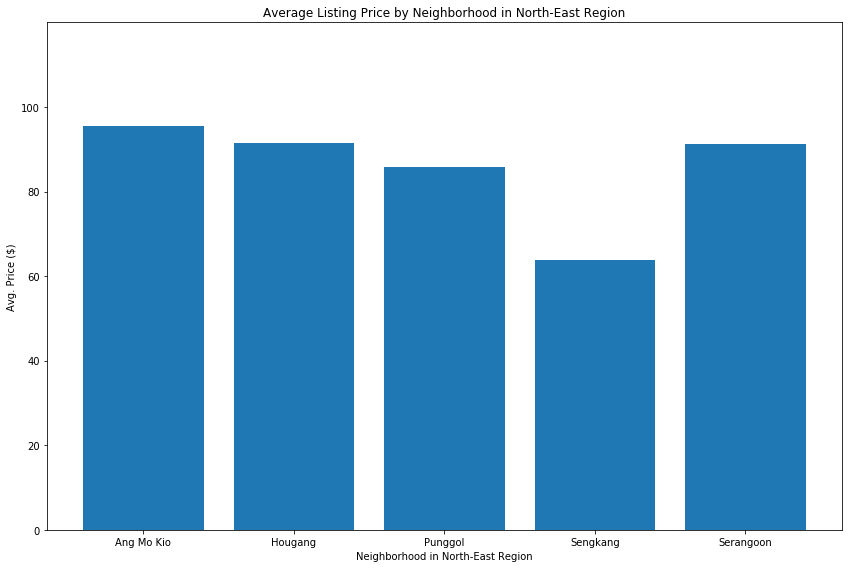

In [17]:
## North-East Region
## Note: Using data w/o >$500 and $0 listings.
north_east_region_breakdown = airbnb_data[airbnb_data['Region']=='North-East Region']

## Groupby to find avg listing price in each neighborhood within the central region.
price_by_neighborhood_north_east = pd.DataFrame(north_east_region_breakdown['Price'].groupby(by=north_east_region_breakdown['Neighborhood']).mean()).reset_index()

## Plotting the average price by neighborhood in the central region.
plt.figure(figsize=(12,8))
plt.ylim(0, 120)
plt.yticks(np.arange(0, 120, step=20))
plt.title('Average Listing Price by Neighborhood in North-East Region')
plt.xlabel('Neighborhood in North-East Region')
plt.ylabel('Avg. Price ($)')
plt.tight_layout()
plt.bar(x=price_by_neighborhood_north_east['Neighborhood'], height=price_by_neighborhood_north_east['Price'])
plt.show();

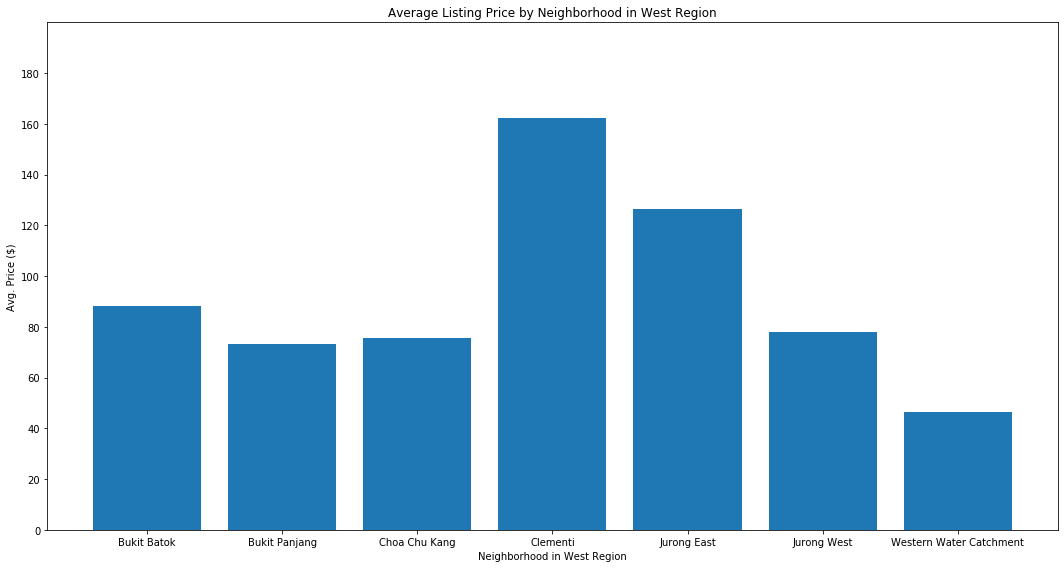

In [18]:
## West Region
## Note: Using data w/o >$500 and $0 listings.
west_region_breakdown = airbnb_data[airbnb_data['Region']=='West Region']

## Groupby to find avg listing price in each neighborhood within the central region.
price_by_neighborhood_west = pd.DataFrame(west_region_breakdown['Price'].groupby(by=west_region_breakdown['Neighborhood']).mean()).reset_index()

## Plotting the average price by neighborhood in the central region.
plt.figure(figsize=(15,8))
plt.ylim(0, 200)
plt.yticks(np.arange(0, 200, step=20))
plt.title('Average Listing Price by Neighborhood in West Region')
plt.xlabel('Neighborhood in West Region')
plt.ylabel('Avg. Price ($)')
plt.tight_layout()
plt.bar(x=price_by_neighborhood_west['Neighborhood'], height=price_by_neighborhood_west['Price'])
plt.show();

In [19]:
## groupby to find average prices by neighborhood. All neighborhoods together. W/o outliers (>$500 and 0$ listings)
price_by_neighborhood = pd.DataFrame(airbnb_data['Price'].groupby(by=airbnb_data['Neighborhood']).mean()).reset_index()

columns = ['Price', 'Region', 'Neighborhood']
all_neighborhoods_data = airbnb_data[columns]
all_neighborhoods_avg_price = all_neighborhoods_data.groupby(['Region', 'Neighborhood']).mean().reset_index()
all_neighborhoods_avg_price.head();

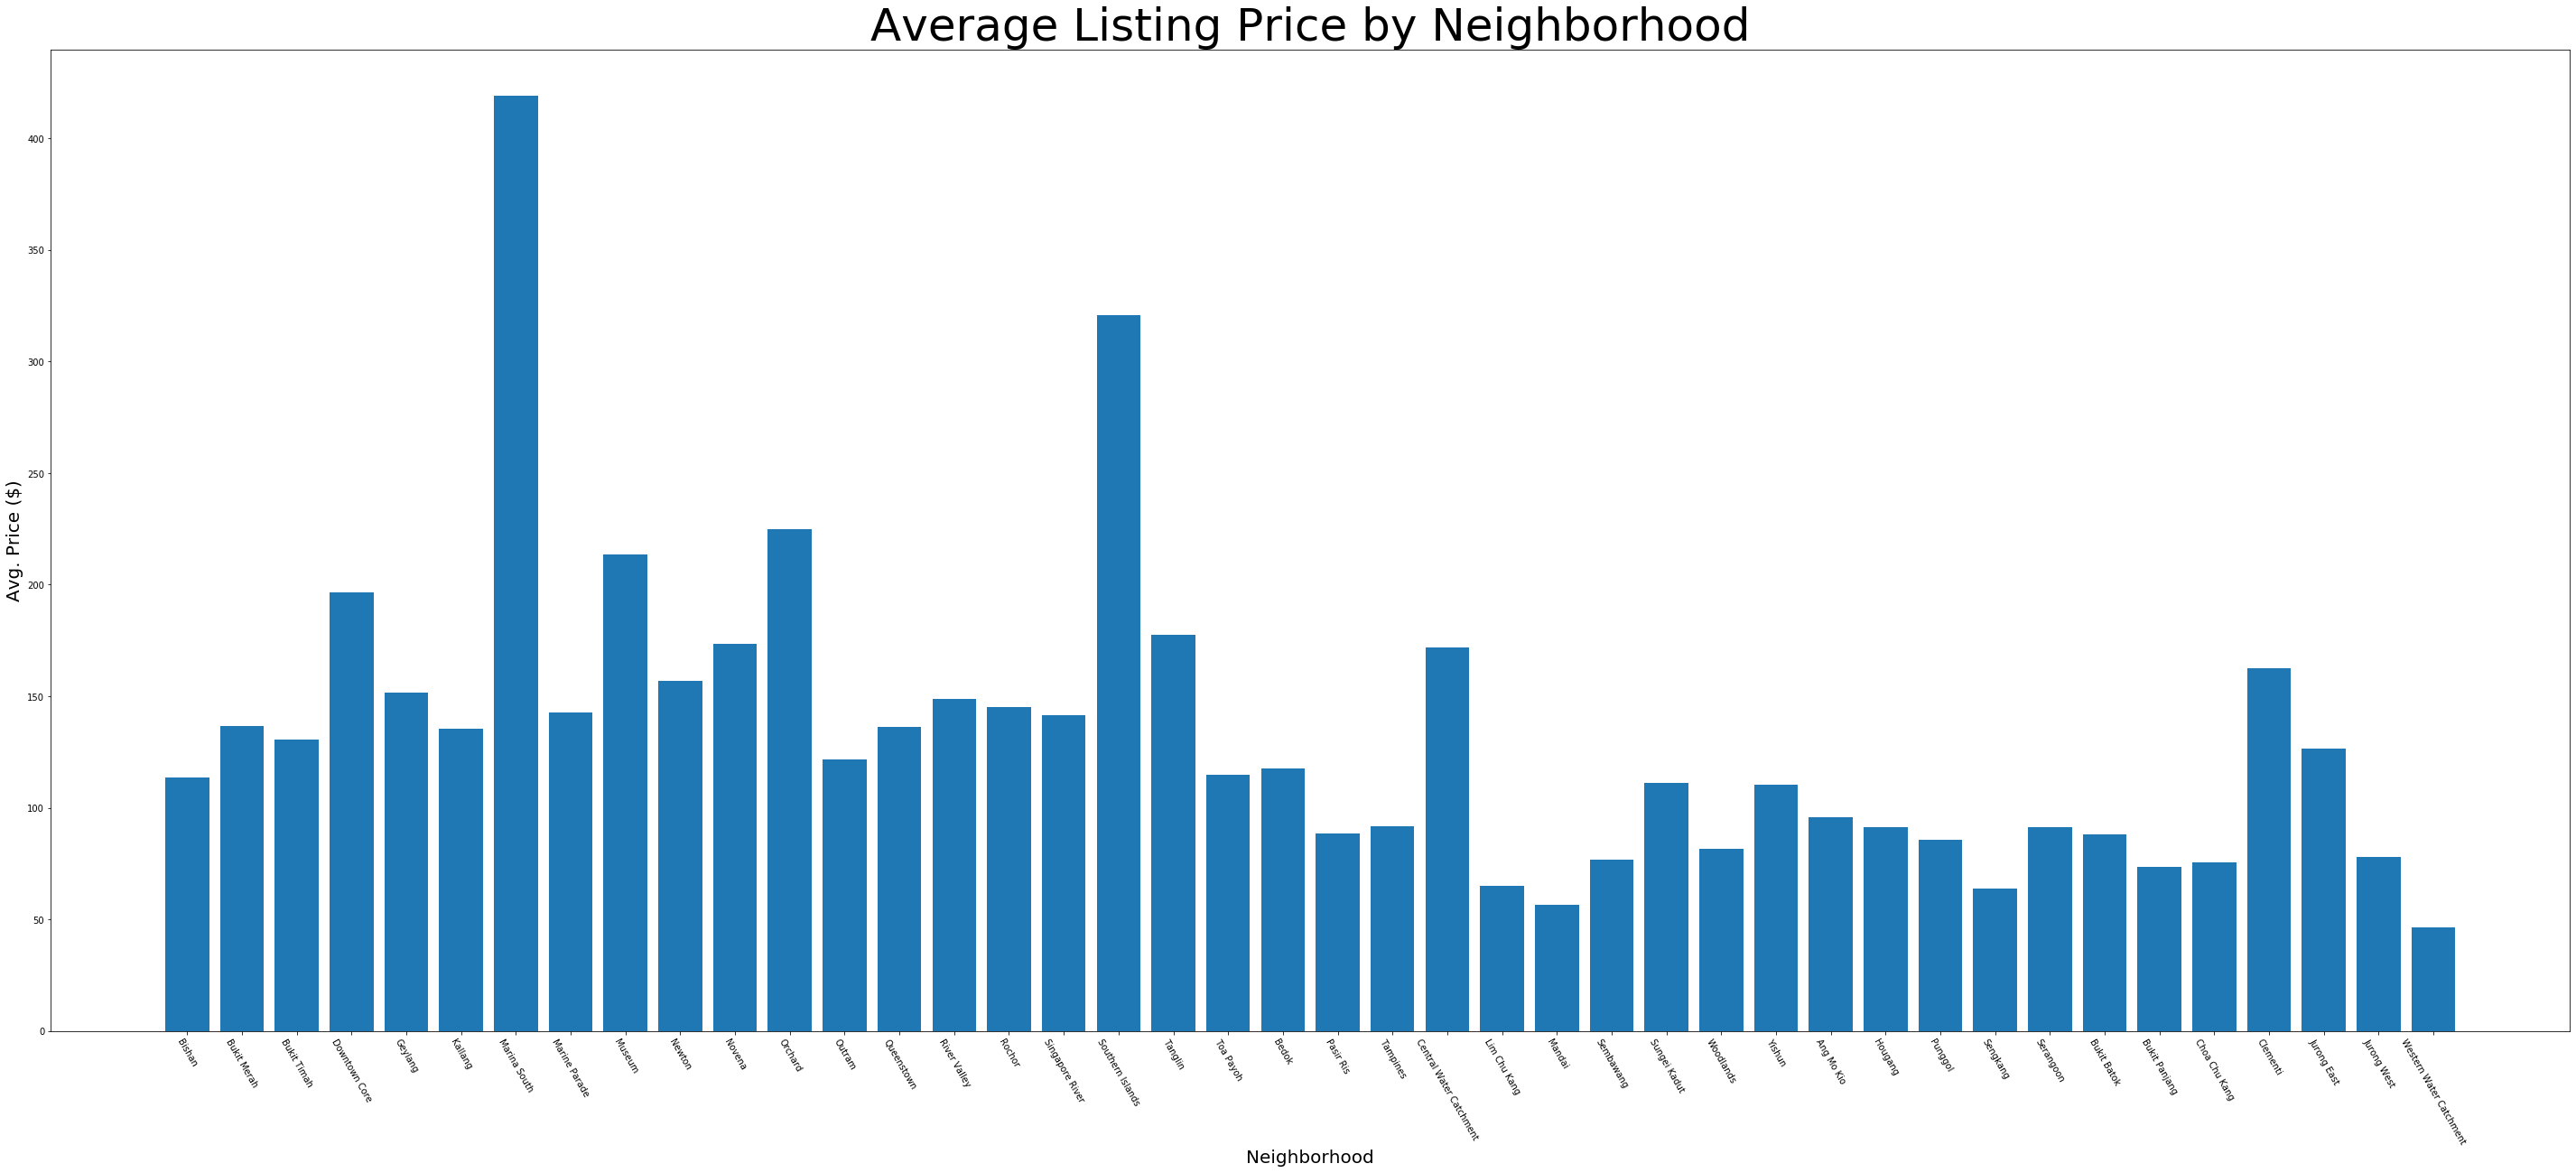

In [20]:
## Plotting the average price by neighborhood. W/o outliers (>$500 and 0$ listings)
plt.figure(figsize=(50,20))
plt.bar(x=all_neighborhoods_avg_price["Neighborhood"],height=all_neighborhoods_avg_price["Price"], align='center')
plt.title('Average Listing Price by Neighborhood', fontsize=50)
plt.xlabel('Neighborhood', fontsize=20)
plt.ylabel('Avg. Price ($)', fontsize=20)
plt.yticks(np.arange(0, 450, step=50))
plt.xticks(rotation=-60)
plt.show();

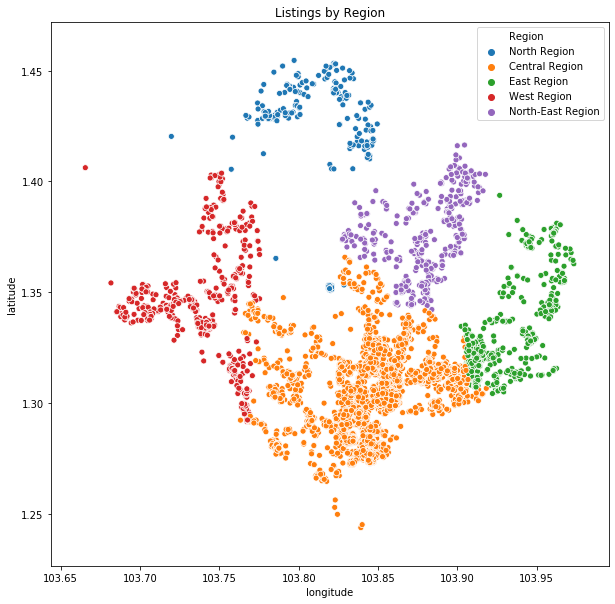

In [27]:
## Plot longitude and latitude. 
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x='longitude', y='latitude', hue='Region', data=airbnb_data)
plt.title('Listings by Region')
plt.show();

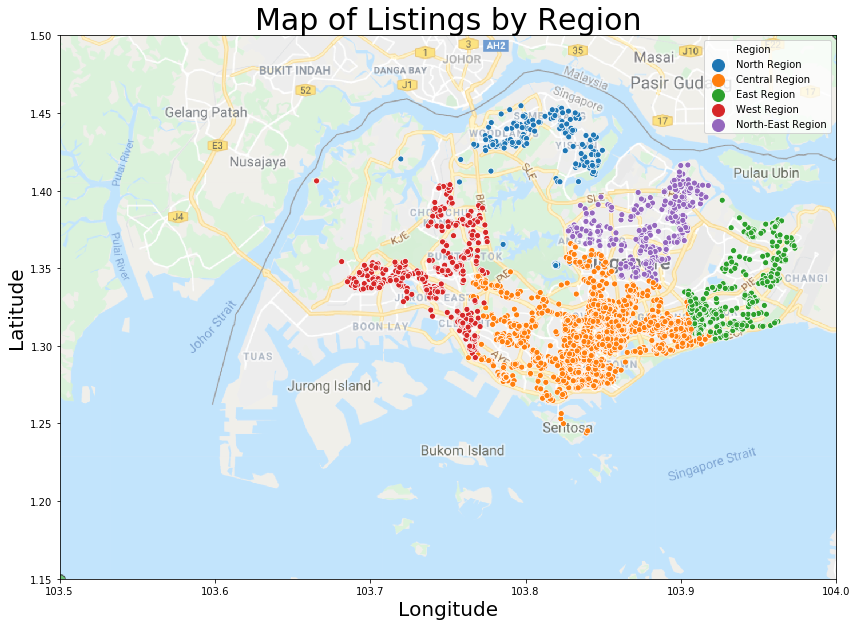

In [30]:
## Grouping by region to further visualize the regions in the city. 
singapore_map = mpimg.imread('singapore_map.png')
# plot the data
plt.figure(figsize=(40,10))
sns.scatterplot(x='longitude', y='latitude', hue='Region', data=airbnb_data)
plt.imshow(singapore_map, alpha=.75, extent=[103.5, 104, 1.15, 1.5])   
plt.ylim(1.15, 1.5)
plt.xlim(103.5, 104)
plt.title('Map of Listings by Region', fontsize=30)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.legend(fontsize=10, markerscale=2)
plt.show();

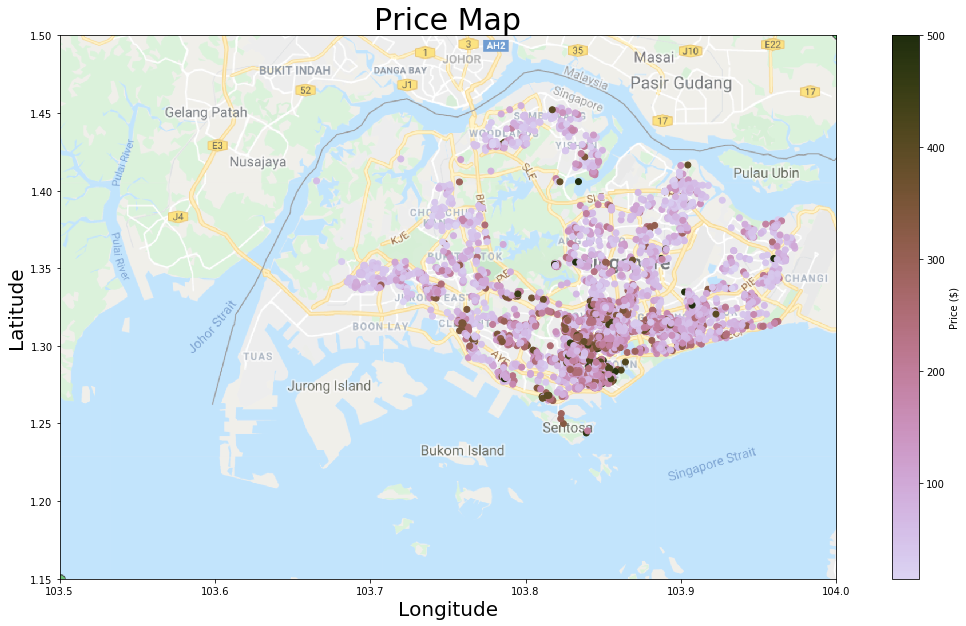

In [59]:
## Grouping by price and superimposing onto a map of the city.
cmap = sns.cubehelix_palette(10, start=2, rot=-.75, as_cmap=True)
f, ax = plt.subplots(figsize=(20,10))
points = ax.scatter(x='longitude', y='latitude', c='Price', data=airbnb_data, cmap=cmap)
f.colorbar(points, label='Price ($)')
plt.imshow(singapore_map, alpha=.75, extent=[103.5, 104, 1.15, 1.5])  
plt.ylim(1.15, 1.5)
plt.xlim(103.5, 104)
plt.title("Price Map", fontsize=30)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.show();

The [instructions](https://towardsdatascience.com/lets-plot-airbnb-prices-on-a-map-of-singapore-ddbcae44fb69) I used to superimpose my scatterplot onto a map.